In [96]:
import pandas as pd
import numpy as np
import os
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from screeninfo import get_monitors
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from pandas.api.types import CategoricalDtype
#04_analysis_osm_presence_igm_declaration.py
import seaborn as sns

In [97]:
province_region = {'Matera': 'Basilicata',
                     'Potenza': 'Basilicata',
                     'Campobasso': 'Molise',
                     'Isernia': 'Molise',
                     'Pesaro e Urbino': 'Marche',
                     'Caserta': 'Campania',
                     'Catanzaro': 'Calabria',
                     'Ancona': 'Marche',
                     'Benevento': 'Campania',
                     'Cosenza': 'Calabria',
                     'Reggio di Calabria': 'Calabria',
                     'Macerata': 'Marche',
                     'Napoli': 'Campania',
                     'Trapani': 'Sicilia',
                     'Ascoli Piceno': 'Marche',
                     'Avellino': 'Campania',
                     'Palermo': 'Sicilia',
                     'Massa Carrara': 'Toscana',
                     'Salerno': 'Campania',
                     'Messina': 'Sicilia',
                     'Lucca': 'Toscana',
                     "L'Aquila": 'Abruzzo',
                     'Agrigento': 'Sicilia',
                     'Pistoia': 'Toscana',
                     'Teramo': 'Abruzzo',
                     'Caltanissetta': 'Sicilia',
                     'Firenze': 'Toscana',
                     'Pescara': 'Abruzzo',
                     'Enna': 'Sicilia',
                     'Livorno': 'Toscana',
                     'Chieti': 'Abruzzo',
                     'Catania': 'Sicilia',
                     'Pisa': 'Toscana',
                     'Ragusa': 'Sicilia',
                     'Arezzo': 'Toscana',
                     'Foggia': 'Puglia',
                     'Siracusa': 'Sicilia',
                     'Siena': 'Toscana',
                     'Bari': 'Puglia',
                     'Grosseto': 'Toscana',
                     'Taranto': 'Puglia',
                     'Prato': 'Toscana',
                     'Viterbo': 'Lazio',
                     'Brindisi': 'Puglia',
                     'Crotone': 'Calabria',
                     'Vibo Valentia': 'Calabria',
                     'Rieti': 'Lazio',
                     'Lecce': 'Puglia',
                     'Latina': 'Lazio',
                     'Frosinone': 'Lazio',
                     'Roma': 'Lazio',
                     'Fermo': 'Marche',
                     'Barletta-Andria-Trani': 'Puglia',
                     'Perugia':'Umbria',
                     'Terni':'Umbria',
                     'Cagliari':'Sardegna',
                     'Nuoro':'Sardegna',
                     'Oristano':'Sardegna',
                     'Sassari':'Sardegna',
                     'Sud Sardegna':'Sardegna'}


In [98]:
data = pd.read_parquet("data" + os.sep + "data_igm_provenance_osm_provincies.parquet")
data.rename(columns={'objects':'total_objects'},inplace=True)
data_italy = data.groupby(['name_it', 'name_en','layer_name']).agg({'osm_objects': 'sum','total_objects': 'sum'}).reset_index()
data_region = data.groupby(['region','name_it', 'name_en','layer_name']).agg({'osm_objects': 'sum','total_objects': 'sum'}).reset_index()
data_provincies = data.groupby(['province','name_it', 'name_en','layer_name']).agg({'osm_objects': 'sum','total_objects': 'sum'}).reset_index()

In [99]:
description_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRgAq3z8-cU_Fy88TUxteuTt_jsvUXIyFUFEbTrRuOXl2KFK-dbAgKAogJxUQtKkdPO5QzJm0M59Pw1/pub?gid=973898789&single=true&output=csv"
description_data = pd.read_csv(description_url)

In [100]:
# Specificare l'ordine delle categorie
categories_order = [
    'Geodetic information',
    'Cartographic and meta-information',
    'Roads',
    'Railways',
    'Other transport',
    'Buildings',
    'Man-made construction',
    'Transport infrastructure works',
    'Soil support and defence works',
    'Hydraulic, defence and hydraulic regulation works',
    'Inland and transitional waters',
    'Marine waters',
    'Glaciers and perennial snowfields',
    'Hydrographic network',
    'Altimetry',
    'Bathymetry',
    'Terrain forms',
    'Digital terrain models (tin, dem/dtm)',
    'Agro-forestry areas',
    'Urban greenery',
    'Water supply network',
    'Electricity network',
    'Gas distribution network',
    'Oil pipelines',
    'Significant locations',
    'Cartographic inscriptions',
    'Local authority administrative areas',
    'Transport services',
    'Pertinences',
    'Quarries-dumps'
]
cat_type = CategoricalDtype(categories=categories_order, ordered=True)


In [101]:
regions_label = ""
for r in data_region.region.unique():
    regions_label += r + " "


In [102]:
regions_label

'Abruzzo Basilicata Calabria Campania Lazio Marche Molise Puglia Sardegna Sicilia Toscana Umbria '

In [103]:
data_italy['percentage'] = round(data_italy['osm_objects'] / data_italy['total_objects'] * 100,3)
data_italy_with_osm = data_italy[data_italy.percentage >= 1]
data_italy_with_osm['missing'] = 100 - data_italy_with_osm['percentage']
data_italy_with_osm = data_italy_with_osm.sort_values(by='percentage', ascending=False)

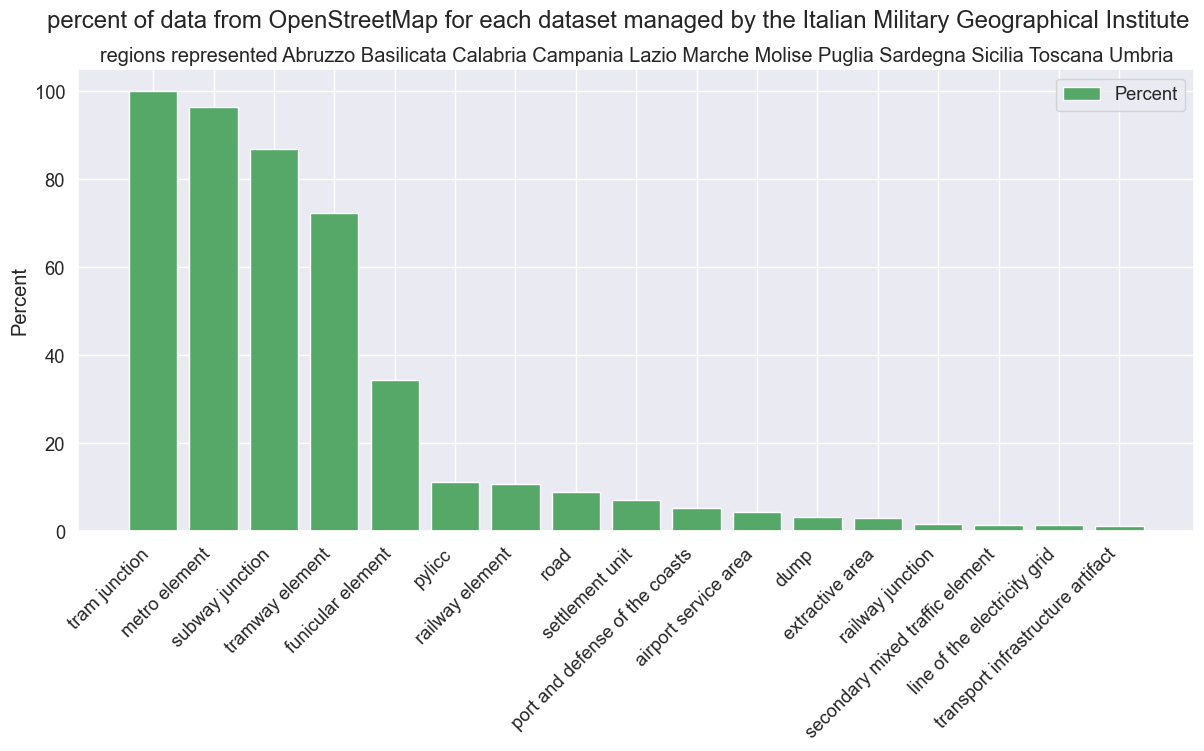

<Figure size 640x480 with 0 Axes>

In [104]:
monitor_width = int(get_monitors()[0].width)
fig, ax = plt.subplots(figsize=(monitor_width/100, 6))
plt.bar(data_italy_with_osm['name_en'], data_italy_with_osm['percentage'], color='g', label='Percent')
#plt.bar(data_italy_with_osm['name_en'], data_italy_with_osm['missing'], bottom=data_italy_with_osm['percentage'], color='g', label='Missing')
#plt.xlabel('Items')
plt.ylabel('Percent')
ax.set_xticks(range(len(data_italy_with_osm)))
ax.set_xticklabels(data_italy_with_osm['name_en'], rotation=45, ha='right')
plt.legend()
plt.suptitle("percent of data from OpenStreetMap for each dataset managed by the Italian Military Geographical Institute")
plt.title("regions represented " + regions_label.rstrip())
plt.show()
plt.savefig('image/percent_osm_dataset_igm.jpg', dpi=300)


In [105]:
data_regione_with_osm_data = data_region[data_region.osm_objects > 0]
data_regione_with_osm_data['percentage'] = round(data_regione_with_osm_data['osm_objects'] / data_regione_with_osm_data['total_objects'] * 100,3)
data_regione_with_osm_data[data_regione_with_osm_data.percentage >= 1]

,region,name_it,name_en,layer_name,osm_objects,total_objects,percentage
6,Abruzzo,area a servizio del trasporto su ferro,area of ​​transport on iron transport,sv_fer,1,81,1.235
51,Abruzzo,manufatto d'infrastruttura di trasporto,transport infrastructure artifact,man_tr,6,76,7.895
59,Abruzzo,opera portuale e di difesa delle coste,port and defense of the coasts,op_por,29,579,5.009
73,Abruzzo,unità insediativa,settlement unit,pe_uins,32,1328,2.410
144,Basilicata,tratto di linea della rete elettrica,line of the electricity grid,tr_ele,20,1551,1.289
...,...,...,...,...,...,...,...
862,Umbria,giunzione ferroviaria,railway junction,gz_fer,4,199,2.010
871,Umbria,manufatto d'infrastruttura di trasporto,transport infrastructure artifact,man_tr,3,40,7.500
886,Umbria,sostegno a traliccio,pylicc,tralic,1928,29308,6.578
892,Umbria,tratto stradale,road,tr_str,60799,63073,96.395


In [106]:
data_regione_with_osm_data['category_en'] = data_regione_with_osm_data.layer_name.apply(lambda x: description_data[description_data.layer_name == x]['category_en'].values[0])

In [107]:
data_regione_with_osm_data['category_en'] = data_regione_with_osm_data['category_en'].astype(cat_type)

In [108]:
data_regione_with_osm_data_category = data_regione_with_osm_data.groupby(['region','category_en']).agg({'osm_objects': 'sum', 'total_objects': 'sum'})

In [109]:
data_regione_with_osm_data_category['percent_in_osm'] = round((data_regione_with_osm_data_category['osm_objects'] / data_regione_with_osm_data_category['total_objects']) * 100,2)

In [110]:
data_regione_with_osm_data_category

osm_objects  total_objects  \
region  category_en                                                        
Abruzzo Geodetic information                            0              0   
        Cartographic and meta-information               0              0   
        Roads                                           7         506875   
        Railways                                        0              0   
        Other transport                                 0              0   
...                                                   ...            ...   
Umbria  Cartographic inscriptions                       0              0   
        Local authority administrative areas            0              0   
        Transport services                              1             16   
        Pertinences                                   261           1381   
        Quarries-dumps                                 10            132   

                                              percent_in_osm  
region  category_en                                           
Abruzzo Geodetic information                             NaN  
        Cartographic and meta-information                NaN  
        Roads                                           0.00  
        Railways                                         NaN  
        Other transport                                  NaN  
...                                                      ...  
Umbria  Cartographic inscriptions                        NaN  
        Local authority administrative areas             NaN  
        Transport services                              6.25  
        Pertinences                                    18.90  
        Quarries-dumps                                  7.58  

[360 rows x 3 columns]

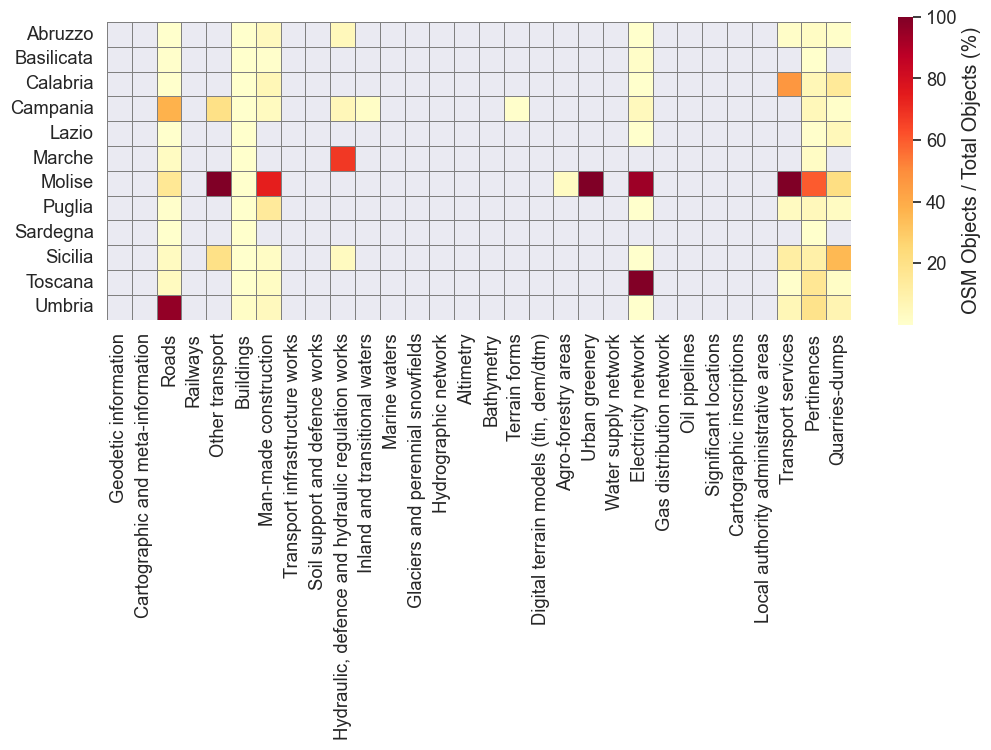

In [111]:
# Calcolo la percentuale di osm_objects su total_objects per ogni combinazione di region e category_en
data_regione_with_osm_data['percent'] = data_regione_with_osm_data['osm_objects'] / data_regione_with_osm_data['total_objects'] * 100

# Creo un nuovo dataframe con le percentuali calcolate e i valori mancanti impostati a NaN
#heatmap_data = data_regione_with_osm_data.pivot(index='region', columns='category_en', values='percent')
heatmap_data = data_regione_with_osm_data.groupby(['region', 'category_en'])['percent'].mean().unstack()
heatmap_data = heatmap_data[categories_order].sort_index().reindex(index=sorted(heatmap_data.index))

# Creo la heatmap table utilizzando la funzione heatmap di seaborn
cmap = sns.color_palette("YlOrRd", as_cmap=True)
sns.set(font_scale=1.2) # imposta la dimensione dei caratteri del grafico
fig, ax = plt.subplots(figsize=(12, 8)) # imposta le dimensioni del grafico
sns.heatmap(heatmap_data, cmap=cmap, annot=False, 
            fmt=".1f", cbar_kws={'label': 'OSM Objects / Total Objects (%)', 'shrink': 0.5}, 
            linewidths=0.5, linecolor='gray', square=True)
ax.set_xlabel('') # rimuove l'etichetta "category_en" nella legenda
ax.set_ylabel('') # rimuove l'etichetta "region" nella legenda
plt.savefig("image" + os.sep + "percent_osm_by_region_and_category.png", dpi=300, bbox_inches='tight') # salva il grafico in un file jpg a 300dpi

In [112]:
heatmap_data

category_en,Geodetic information,Cartographic and meta-information,Roads,Railways,Other transport,Buildings,Man-made construction,Transport infrastructure works,Soil support and defence works,"Hydraulic, defence and hydraulic regulation works",...,Water supply network,Electricity network,Gas distribution network,Oil pipelines,Significant locations,Cartographic inscriptions,Local authority administrative areas,Transport services,Pertinences,Quarries-dumps
region,,,,,,,,,,,,,,,,,,,,,
Abruzzo,NaN,NaN,0.001538,NaN,NaN,0.027429,3.955096,NaN,NaN,5.008636,...,NaN,0.349650,NaN,NaN,NaN,NaN,NaN,1.234568,2.409639,0.990099
Basilicata,NaN,NaN,0.498857,NaN,NaN,0.002855,0.491302,NaN,NaN,NaN,...,NaN,1.289491,NaN,NaN,NaN,NaN,NaN,NaN,0.046104,NaN
Calabria,NaN,NaN,0.028473,NaN,NaN,0.001701,5.922123,NaN,NaN,NaN,...,NaN,0.076341,NaN,NaN,NaN,NaN,NaN,46.666667,6.210027,14.634146
Campania,NaN,NaN,37.578615,NaN,20.0,0.007123,3.848735,NaN,NaN,5.472750,...,NaN,4.353519,NaN,NaN,NaN,NaN,NaN,NaN,5.309735,1.020408
Lazio,NaN,NaN,0.023268,NaN,NaN,0.009043,NaN,NaN,NaN,NaN,...,NaN,0.000313,NaN,NaN,NaN,NaN,NaN,NaN,0.497447,5.405405
Marche,NaN,NaN,2.769991,NaN,NaN,0.167372,NaN,NaN,NaN,67.647059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.285714,NaN
Molise,NaN,NaN,15.696007,NaN,100.0,0.018092,73.865764,NaN,NaN,NaN,...,NaN,94.017094,NaN,NaN,NaN,NaN,NaN,100.000000,60.041841,21.184211
Puglia,NaN,NaN,0.403102,NaN,NaN,0.019837,14.381180,NaN,NaN,NaN,...,NaN,0.077178,NaN,NaN,NaN,NaN,NaN,3.333333,5.077078,2.978995
Sardegna,NaN,NaN,0.377251,NaN,NaN,0.002069,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.157315,NaN


In [113]:
# Esportiamo la griglia generata dal grafico in un formato csv
heatmap_data.to_csv('data/percente_osm_category_by_region.csv')

In [114]:
data_provincies_with_osm_data = data_provincies[data_provincies.osm_objects > 0]
data_provincies_with_osm_data['percent'] = round(data_provincies_with_osm_data['osm_objects'] / data_provincies_with_osm_data['total_objects'] * 100,3)
data_provincies_with_osm_data = data_provincies_with_osm_data[data_provincies.osm_objects > 0]

/tmp/ipykernel_6935/2450430381.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_provincies_with_osm_data = data_provincies_with_osm_data[data_provincies.osm_objects > 0]


In [115]:
data_provincies_with_osm_data['category_en'] = data_provincies_with_osm_data.layer_name.apply(lambda x: description_data[description_data.layer_name == x]['category_en'].values[0])

In [116]:
data_provincies_with_osm_data['region'] = data_provincies_with_osm_data['province'].apply(lambda x: province_region[x])

In [117]:
data_provincies_with_osm_data['category_en'] = data_provincies_with_osm_data['category_en'].astype(cat_type)

In [128]:
# Creiamo una pivot table per avere la percentuale di osm_objects in total_objects per ogni provincia e categoria
pivot_table = pd.pivot_table(data_provincies_with_osm_data, values=['osm_objects', 'total_objects'], index=['region', 'province'], columns=['category_en'])
pivot_table = pivot_table['osm_objects'].div(pivot_table['total_objects'], axis=0).round(2) * 100
# Sostituiamo tutti i valori NaN con 0
# pivot_table.fillna(0, inplace=True)

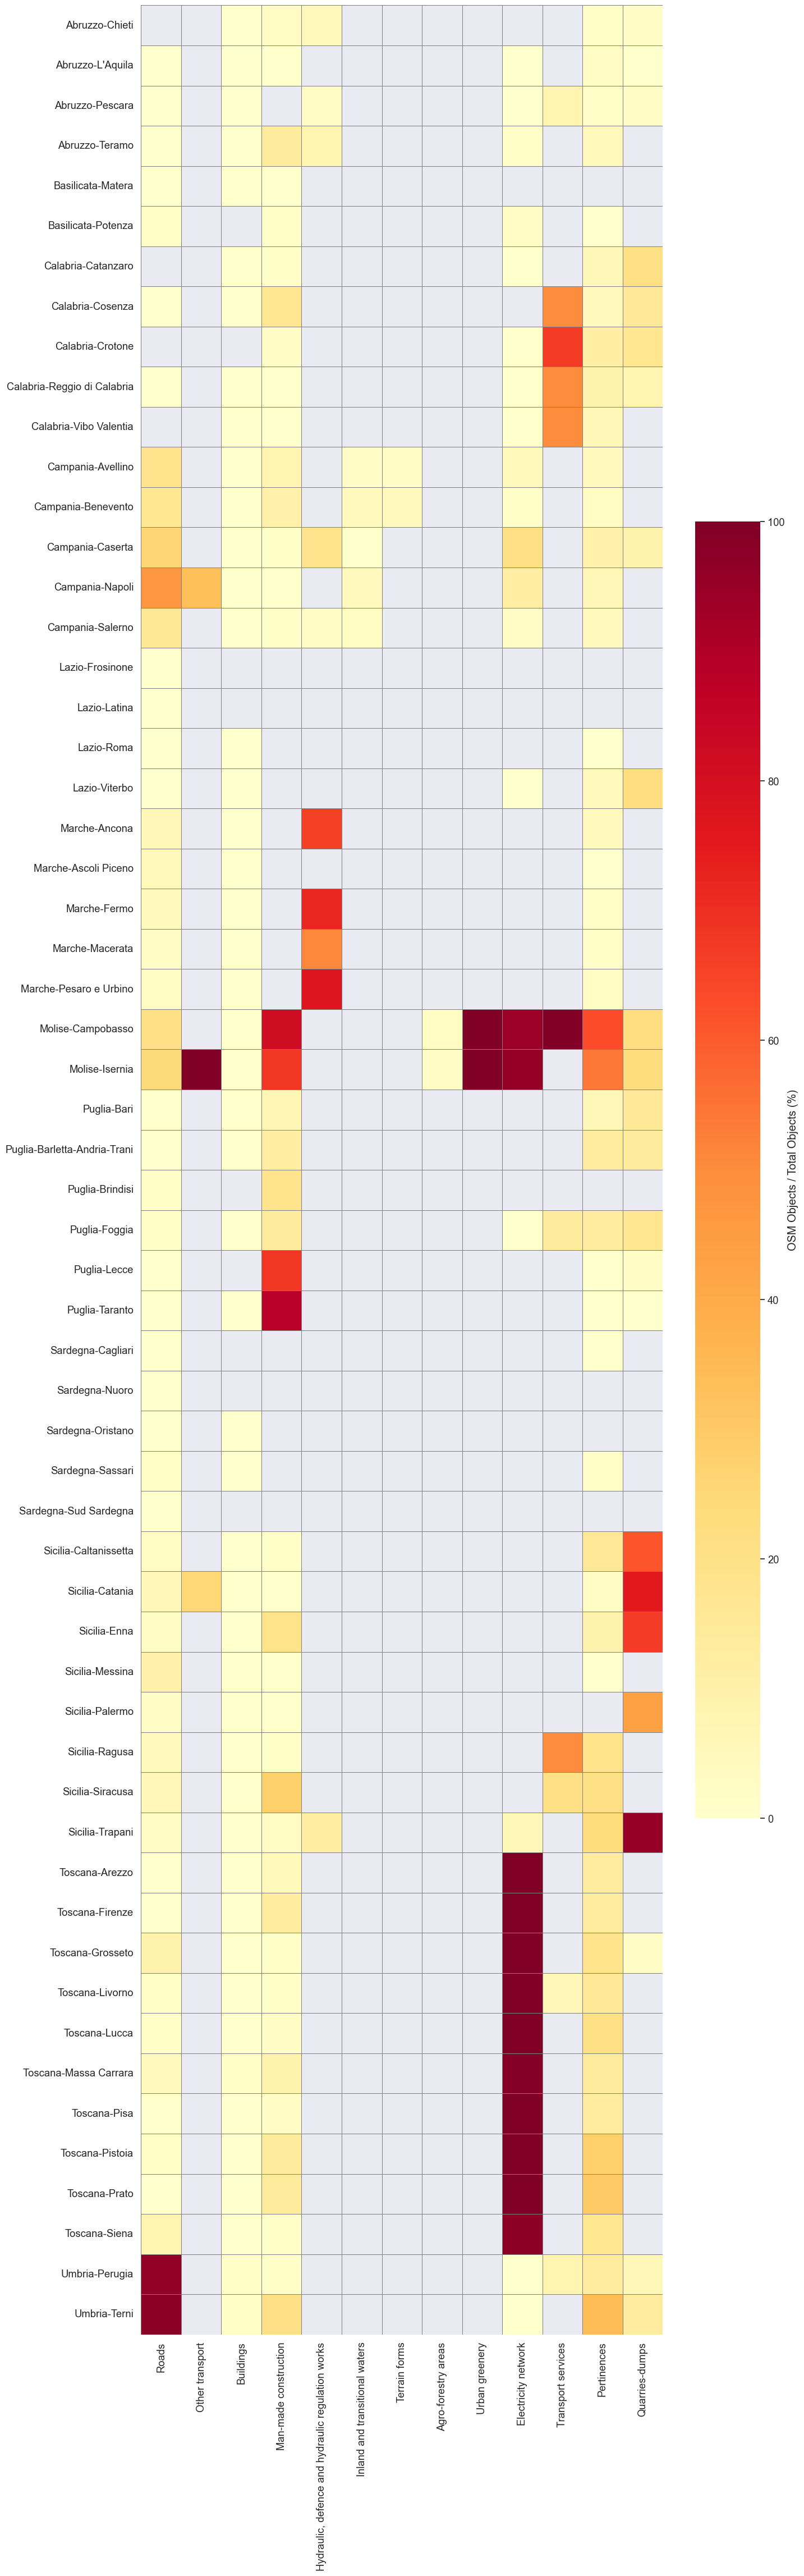

In [141]:
# Creo la heatmap table utilizzando la funzione heatmap di seaborn
cmap = sns.color_palette("YlOrRd", as_cmap=True)
sns.set(font_scale=1.2) # imposta la dimensione dei caratteri del grafico
fig, ax = plt.subplots(figsize=(15, 60)) # imposta le dimensioni del grafico
sns.heatmap(pivot_table, cmap=cmap, annot=False, 
            fmt=".1f", cbar_kws={'label': 'OSM Objects / Total Objects (%)', 'shrink': 0.5}, 
            linewidths=0.5, linecolor='gray', square=True)
ax.set_xlabel('') # rimuove l'etichetta "category_en" nella legenda
ax.set_ylabel('') # rimuove l'etichetta "region" nella legenda
plt.savefig("image" + os.sep + "percent_osm_by_province_and_category.png", dpi=300, bbox_inches='tight') # salva il grafico in un file jpg a 300dpi

In [120]:
data_italy['macrocategory_en'] = data_italy.layer_name.apply(lambda x: description_data[description_data.layer_name == x]['macro_category_en'].values[0])

In [121]:
data_italy

,name_it,name_en,layer_name,osm_objects,total_objects,percentage,macrocategory_en
0,acqua interna,internal water,acq_in,0,3065,0.000,Administrative areas
1,acqua territoriale,territorial water,acq_ter,0,37,0.000,Administrative areas
2,affioramento naturale dell'acqua,natural outcrop of water,af_acq,0,17224,0.000,Hydrography
3,alveo,riverbed,alveo,0,4426,0.000,Orography
4,ambito omogeneo per la metainformazione,homogeneous scope for metainformation,meta,0,6516,0.000,Geodetic and photogrammetric information
...,...,...,...,...,...,...,...
71,tratto di linea della rete elettrica,line of the electricity grid,tr_ele,5073,361992,1.401,Underground utility networks
72,tratto stradale,road,tr_str,269872,2999288,8.998,"Roads, mobility and transport"
73,unità insediativa,settlement unit,pe_uins,3077,43700,7.041,Appurtenant areas
74,vertice di rete,network vertex,v_rete,0,18657,0.000,Geodetic and photogrammetric information


In [122]:
data_italy_macrocategory = data_italy.groupby('macrocategory_en').agg({'osm_objects': 'sum', 'total_objects': 'sum'})
data_italy_macrocategory['percent_osm'] = round((data_italy_macrocategory['osm_objects'] / data_italy_macrocategory['total_objects'] * 100),2)

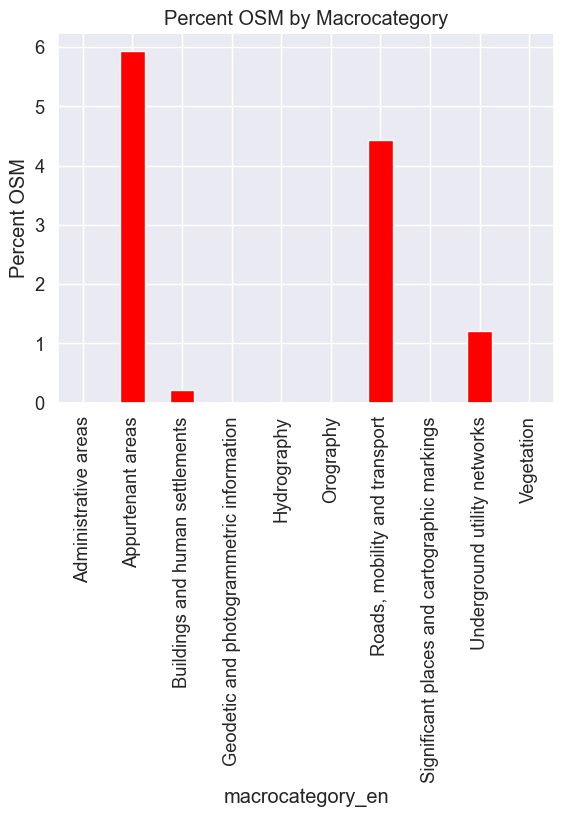

In [123]:
# Creiamo un grafico a barre solo per percent_osm
fig, ax = plt.subplots()
data_italy_macrocategory.plot.bar(y='percent_osm', ax=ax, color='red', legend=False)

# Aggiungiamo le etichette delle assi e il titolo del grafico
ax.set_xlabel('macrocategory_en')
ax.set_ylabel('Percent OSM')
ax.set_title('Percent OSM by Macrocategory')

# Mostrare il grafico
plt.show()